In [1]:
# Imports 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
import pickle
import os
import sys 

In [2]:
# Read the data and define keylists for data frame

data_dict1 = {}
data_dict2 = {}

Pickles_Cond1='%s/../test_conditions/DataSiR_DNA/Pickles_file_16bits/U2OS_SiR_DNA_NoSerum_crops/gmm_constrained/pickle/Statistics.pickle' % os.getcwd()
Pickles_Cond2='%s/../test_conditions/DataSiR_DNA/Pickles_file_16bits/U2OS_SiR_DNA_Serum_crops/gmm_constrained/pickle/Statistics.pickle' % os.getcwd()

ConditionsSTR=['- Serum','+ Serum']

with open(Pickles_Cond1,'rb') as f:
    data_dict1=pickle.load(f)

with open(Pickles_Cond2,'rb') as f:
    data_dict2=pickle.load(f)

# Get File Keylist . TODO: Change to real name
File_keylist1=list(data_dict1.keys())
File_keylist2=list(data_dict2.keys())

# Get biophysical parameters and number of populations . TODO: Currently we use the first file and first biophysical parameter but it can be empty... it needs to be corrected.
Paramdecon_keylist=list(data_dict1[File_keylist1[0]].keys())


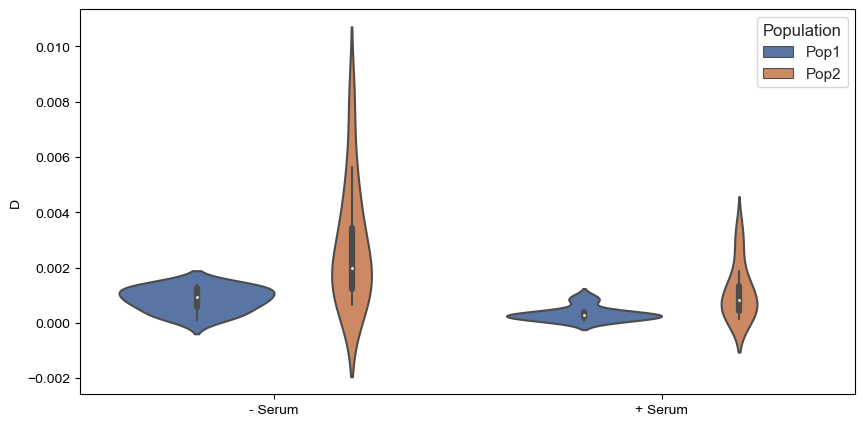

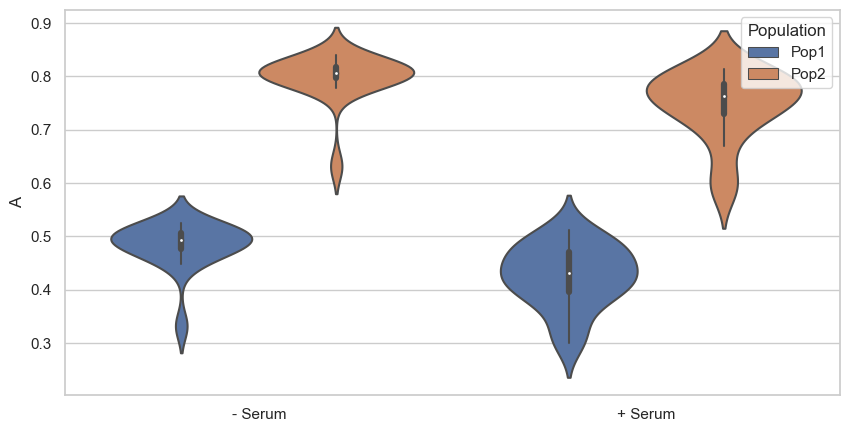

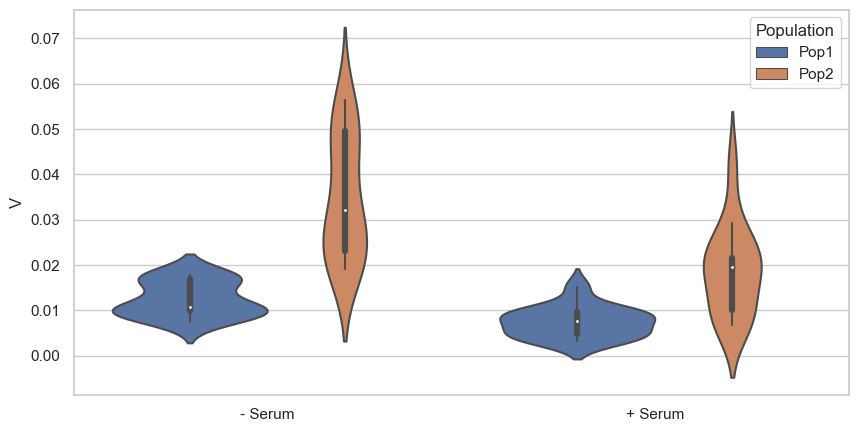

In [3]:
# Read and organize data in Data Frame . TODO：Currently is only adapted to two conditions
# Also it generate plots for each Biophysical parameters. TODO: To separate the plot from the read.
# TODO: Currently we use the first file for each biophysical parameter for the number of populations but it can be empty... it needs to be corrected.

NumberPopulations=2

# Define labels to the populations
PopulationsStrings=[]

for ii in range(NumberPopulations):
    PopulationsStrings.append(f'Pop{ii+1}')

for i in range(len(Paramdecon_keylist)):
    
    
    # Get Condition 1
    meanMat=[]
    meanMatarray=[]

    for j in range(len(File_keylist1)):
        mat_temp=np.array(data_dict1[File_keylist1[j]][Paramdecon_keylist[i]])
        #Check if file is empty
        if mat_temp.size==0:
            continue
        meanMat.append(mat_temp[0,:])
    meanMatarray=np.array(meanMat)
    df1=pd.DataFrame(meanMatarray, columns=PopulationsStrings)
    df1['Condition']=1

    # Get Condition 2
    meanMat=[]
    meanMatarray=[]
    for j in range(len(File_keylist2)):
        mat_temp=np.array(data_dict2[File_keylist2[j]][Paramdecon_keylist[i]])
        #Check if file is empty
        if mat_temp.size==0:
            continue
        meanMat.append(mat_temp[0,:])
    meanMatarray=np.array(meanMat)
    df2=pd.DataFrame(meanMatarray, columns=PopulationsStrings)
    df2['Condition']=2

    # Concatenate the two conditions
    df=pd.concat([df1,df2],ignore_index=True)

    # Melt the data frame to create a long format
    melted_df = pd.melt(df, id_vars=['Condition'], value_vars=PopulationsStrings, var_name='Population', value_name='Value')

    # Plot the data using seaborn violinplot
    fig, axes = plt.subplots(figsize=(10,5))
    sns.set(style="whitegrid")
    sns.violinplot(x='Condition', y='Value', hue='Population', data=melted_df,ax = axes, orient ='v')
    # Set axis labels
    plt.xlabel('')
    plt.xticks([0,1],ConditionsSTR)
    plt.ylabel(Paramdecon_keylist[i])
    # Show the plot
    plt.show()
